In [22]:
from numpy import vstack
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from tqdm import tqdm
from pathlib import Path
import pandas as pd
from PIL import Image, ImageOps
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
dirPath = Path('./')
datasetPath  = Path(dirPath/'data')
noMaskPath  = datasetPath/'1 - without a face mask'
clothMaskPath  = datasetPath/'2 - with a cloth mask'
surgicalMaskPath = datasetPath/'3 - with a surgical mask'
N95MaskPath = datasetPath/'4 - with a N95 mask'
IncorrectMaskPath = datasetPath/'5. - Incorrectly worn Mask'
maskDF = pd.DataFrame()

for imagepath in tqdm(list(noMaskPath .iterdir()), desc='no'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 0
    }, ignore_index=True)
    
for imagepath in tqdm(list(clothMaskPath .iterdir()), desc='cloth'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 1
    }, ignore_index=True)

for imagepath in tqdm(list(N95MaskPath.iterdir()), desc='N95'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 2
    }, ignore_index=True)

for imagepath in tqdm(list(surgicalMaskPath.iterdir()), desc='surgical'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 3
    }, ignore_index=True)


for imagepath in tqdm(list(IncorrectMaskPath.iterdir()), desc='valve'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 4
    }, ignore_index=True)
        

print("Total no. of images:",len(maskDF))
data_frame = datasetPath/'dataset.pickle'
print(f'DataFrame saved successfully: {data_frame}')
maskDF.to_pickle(data_frame)

valve: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 389/389 [00:00<00:00, 1358.78it/s]

Total no. of images: 2056
DataFrame saved successfully: data/dataset.pickle


In [3]:
maskDF

image  mask
0         data/1 - without a face mask/no_mask (44).png   0.0
1        data/1 - without a face mask/no_mask (126).png   0.0
2         data/1 - without a face mask/no_mask (13).jpg   0.0
3         data/1 - without a face mask/no_mask (13).png   0.0
4        data/1 - without a face mask/no_mask (171).png   0.0
...                                                 ...   ...
2051  data/5. - Incorrectly worn Mask/maksssksksss53...   4.0
2052  data/5. - Incorrectly worn Mask/maksssksksss52...   4.0
2053  data/5. - Incorrectly worn Mask/maksssksksss24...   4.0
2054  data/5. - Incorrectly worn Mask/maksssksksss73...   4.0
2055  data/5. - Incorrectly worn Mask/maksssksksss72...   4.0

[2056 rows x 2 columns]

In [16]:
img = Image.open("./data/5. - Incorrectly worn Mask/maksssksksss815.png")
display(img)

In [11]:
img = img.resize((25,25))

In [18]:
gray_image = ImageOps.grayscale(img)
display(gray_image)

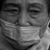

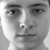

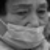

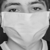

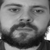

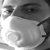

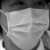

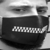

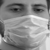

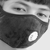

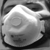

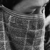

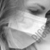

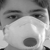

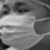

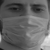

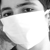

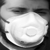

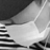

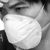

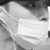

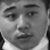

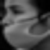

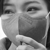

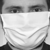

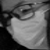

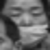

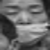

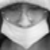

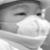

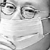

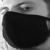

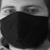

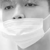

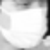

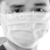

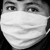

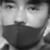

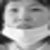

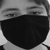

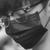

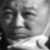

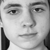

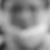

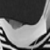

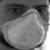

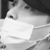

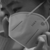

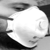

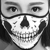

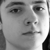

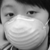

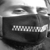

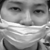

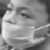

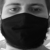

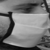

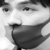

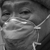

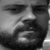

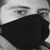

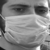

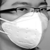

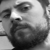

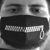

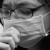

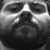

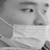

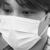

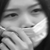

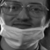

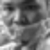

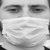

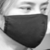

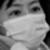

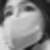

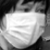

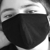

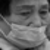

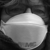

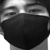

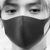

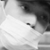

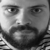

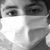

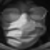

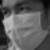

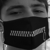

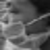

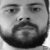

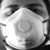

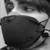

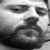

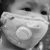

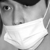

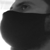

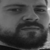

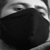

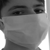

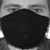

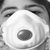

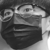

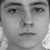

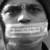

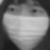

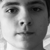

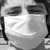

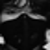

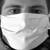

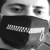

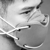

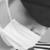

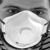

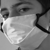

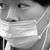

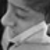

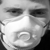

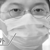

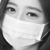

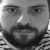

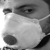

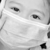

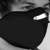

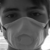

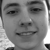

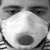

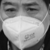

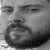

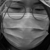

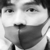

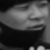

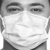

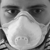

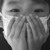

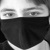

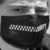

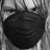

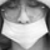

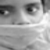

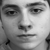

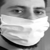

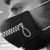

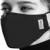

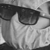

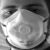

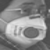

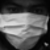

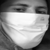

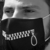

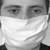

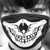

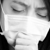

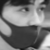

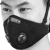

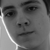

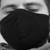

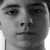

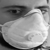

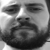

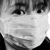

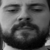

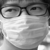

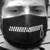

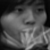

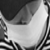

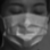

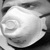

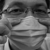

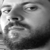

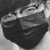

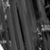

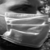

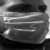

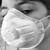

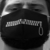

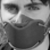

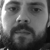

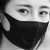

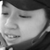

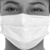

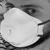

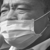

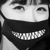

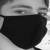

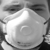

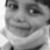

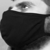

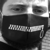

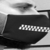

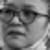

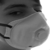

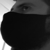

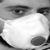

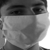

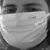

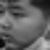

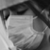

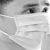

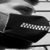

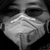

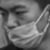

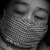

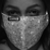

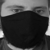

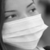

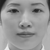

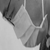

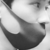

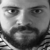

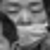

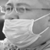

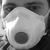

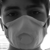

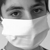

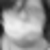

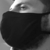

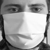

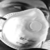

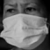

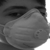

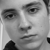

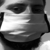

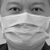

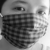

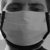

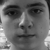

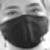

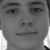

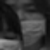

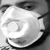

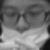

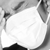

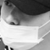

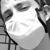

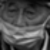

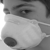

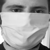

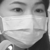

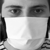

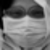

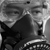

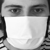

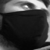

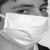

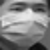

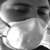

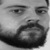

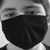

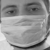

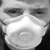

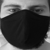

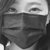

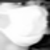

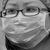

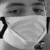

In [34]:
files = glob.glob("./data/5. - Incorrectly worn Mask/*.png")
for file in files:
    img = Image.open(file)
    gray_image = ImageOps.grayscale(img)
    img = gray_image.resize((50,50))
    display(img)